# import modules

In [1]:
import glob
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1_draft import *

# super contour data

In [2]:
file_pattern = "../data/TACC_super_contour_mcz40_*.pkl"
files = glob.glob(file_pattern)

data = {}

for file in files:
    with open(file, "rb") as f:
        file = pickle.load(f)
        data.update(file)

In [3]:
data = get_super_contour_stats(data, thres_factor=1.01, thres_diff=0)
data

{0.025033: {0.008404: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           ...,
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
    'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
           [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
           [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
           ...,
           [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
           [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
           [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
    'epsilon_matrix': array([[0.00246925, 0.00246925, 0.00246925, ..., 0.00246925, 0.00246925,
            0.00246925],
           [0.00242215, 0.00241476, 0.00239729, ..., 0.00179198, 0.00178007,
            0.00176954],
           [0.00237794, 0.00236

In [4]:
with open("../data/super_contour_NP_L_mcz40_2024-05-23_13-59-33.pkl", "rb") as f:
    data_NP_L = pickle.load(f)

data_NP_L

{0.017958: {0.008404: {'epsilon': 0.0013834868326638716},
  0.009133: {'epsilon': 0.0015152353359434434},
  0.00994: {'epsilon': 0.0016626980914218326},
  0.010834: {'epsilon': 0.0018281256040045823},
  0.011827: {'epsilon': 0.002014143893024789},
  0.012932: {'epsilon': 0.002223825811074276},
  0.014162: {'epsilon': 0.0024607774811487015},
  0.015535: {'epsilon': 0.00272924336506164},
  0.01707: {'epsilon': 0.003034234354200027},
  0.018789: {'epsilon': 0.003381684382595118},
  0.020718: {'epsilon': 0.0037786424636029325},
  0.022887: {'epsilon': 0.004233508822505061},
  0.02533: {'epsilon': 0.004756326034021319},
  0.028087: {'epsilon': 0.0053591388936358175},
  0.031205: {'epsilon': 0.006056440295848953},
  0.034737: {'epsilon': 0.006865724825114383},
  0.038747: {'epsilon': 0.00780817726779337},
  0.043308: {'epsilon': 0.008909530009219457},
  0.048506: {'epsilon': 0.010201131440319977},
  0.054442: {'epsilon': 0.011721277117222373},
  0.061233: {'epsilon': 0.013516866332357269},
 

# super contours

In [5]:
td_arr = np.sort(np.array([k for k in data.keys()]))  # already rounded to 6 decimals
I_arr = np.sort(data[td_arr[0]]["I_arr"])
# I_arr = np.sort(np.array([round(I, 6) for I in data[td_arr[0]]["I_arr"]]))
X, Y = np.meshgrid(td_arr, I_arr)
src_params = data[td_arr[0]]["source_params"]

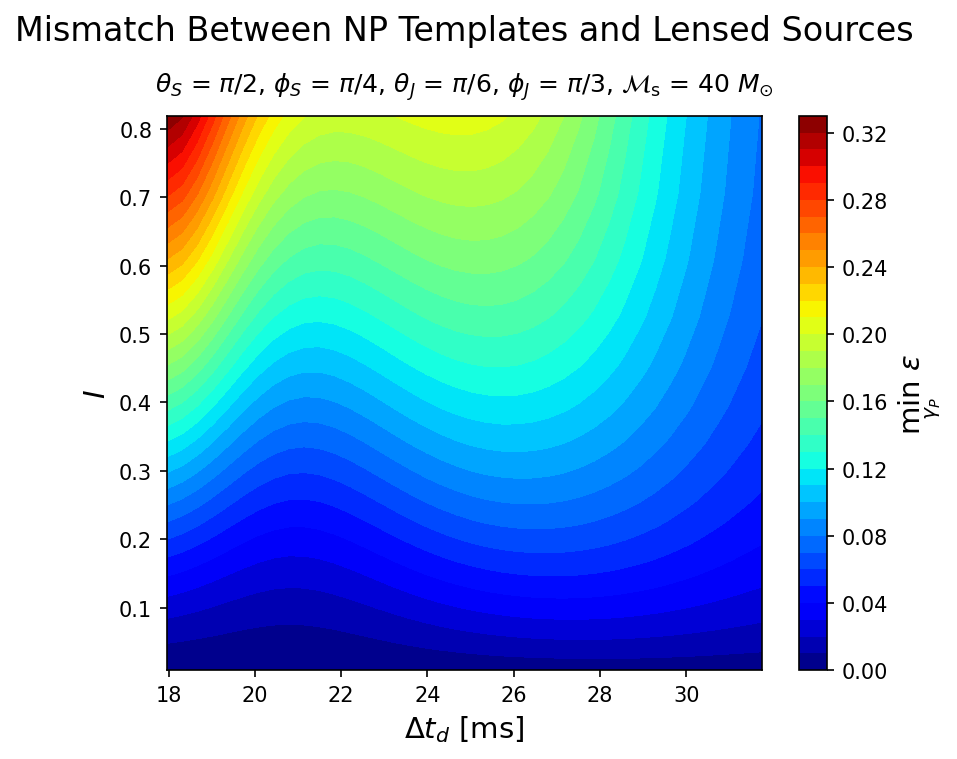

In [6]:
ep_NP_L_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_NP_L_mtx[r, c] = data_NP_L[td][I]["epsilon"]

plt.contourf(X * 1e3, Y, ep_NP_L_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Mismatch Between NP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

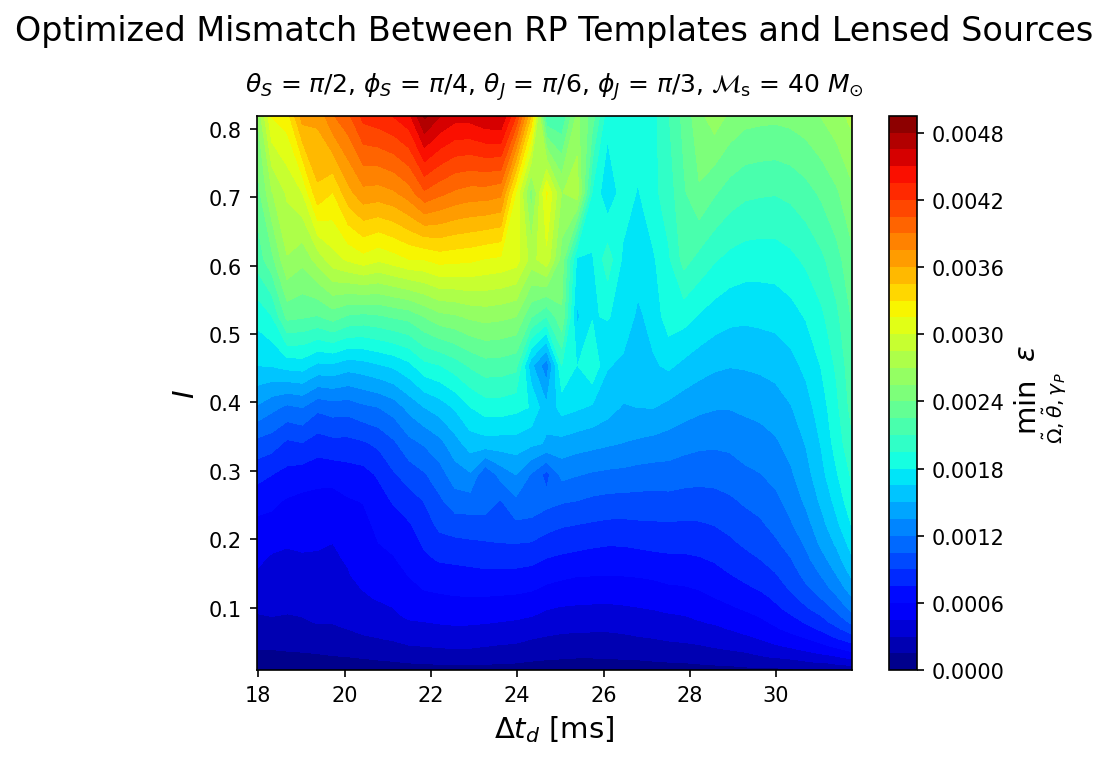

In [7]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X * 1e3, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

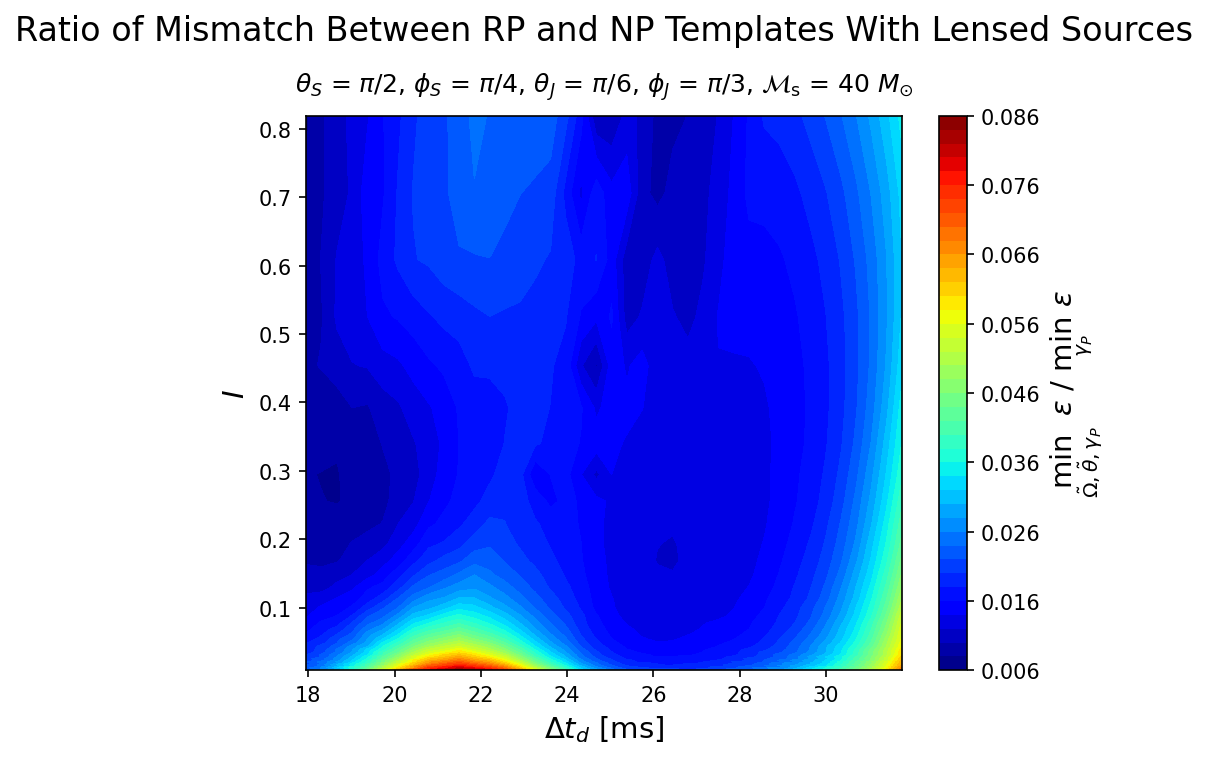

In [8]:
# create a contour that shows the ratio between the two above
ep_ratio_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_ratio_mtx[r, c] = ep_min_mtx[r, c] / ep_NP_L_mtx[r, c]

plt.contourf(X * 1e3, Y, ep_ratio_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$ / $\min_{\gamma_P}$ $\epsilon$",
    size=14,
)
plt.suptitle(
    "Ratio of Mismatch Between RP and NP Templates With Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

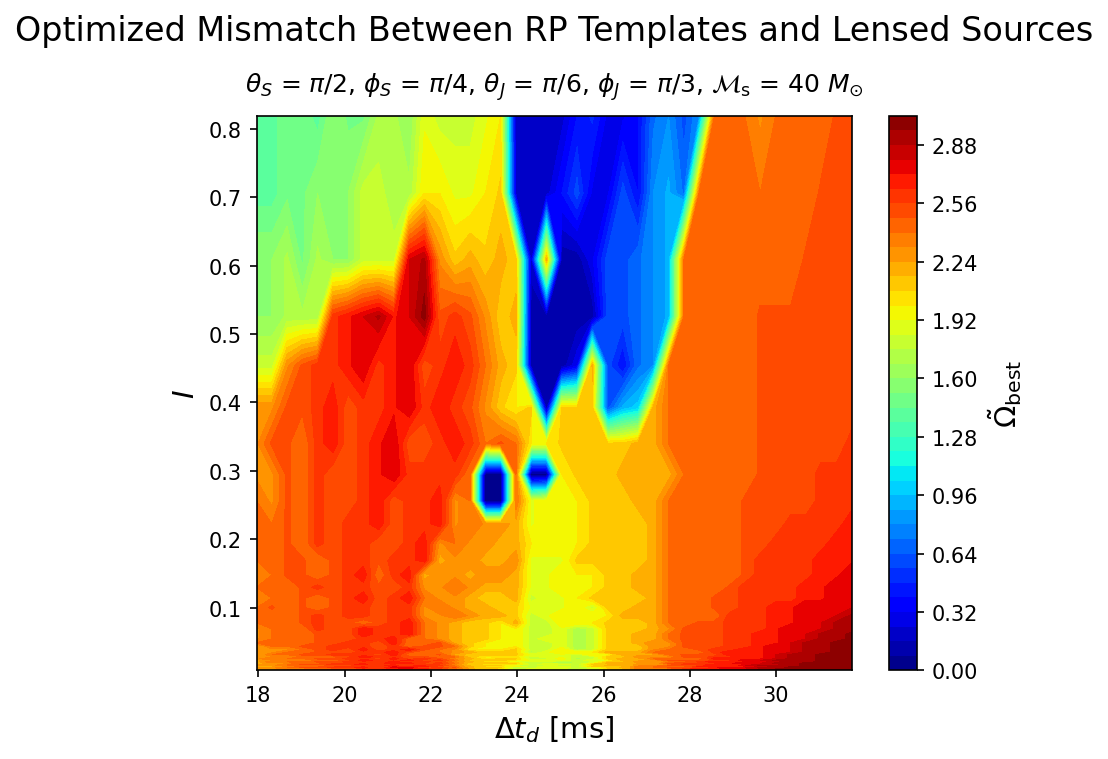

In [9]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X * 1e3, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

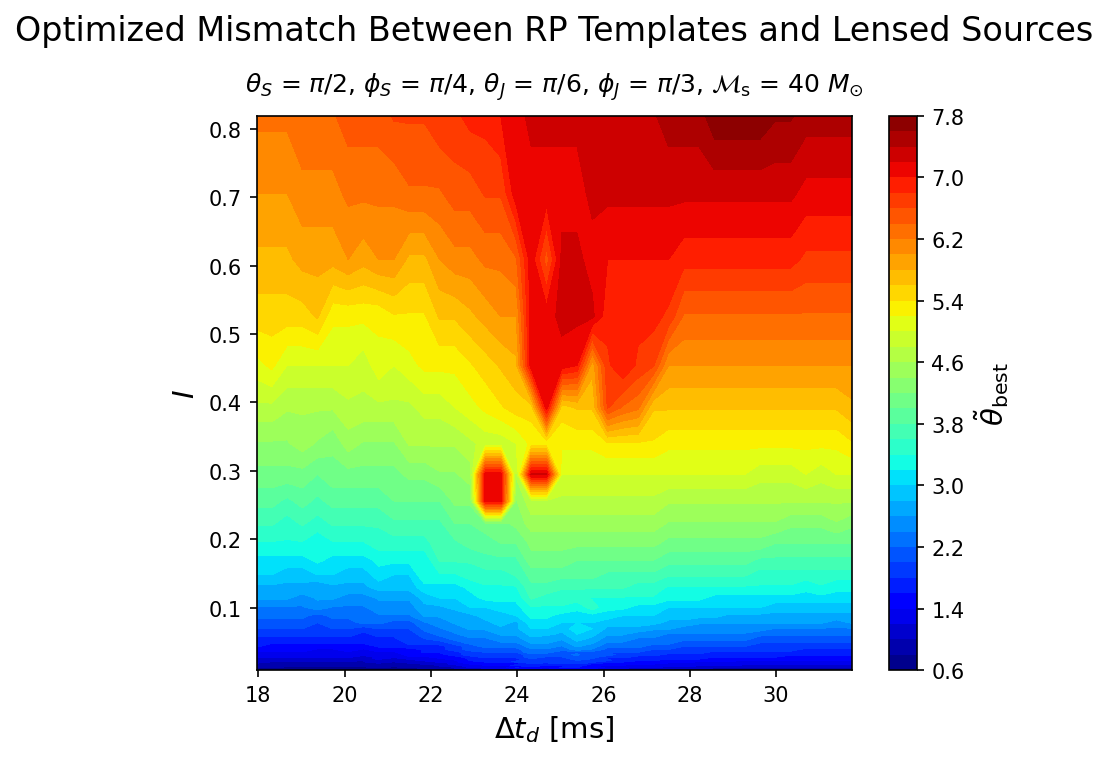

In [10]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X * 1e3, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

# as a function of $\Delta t_d$ while fixing $I$

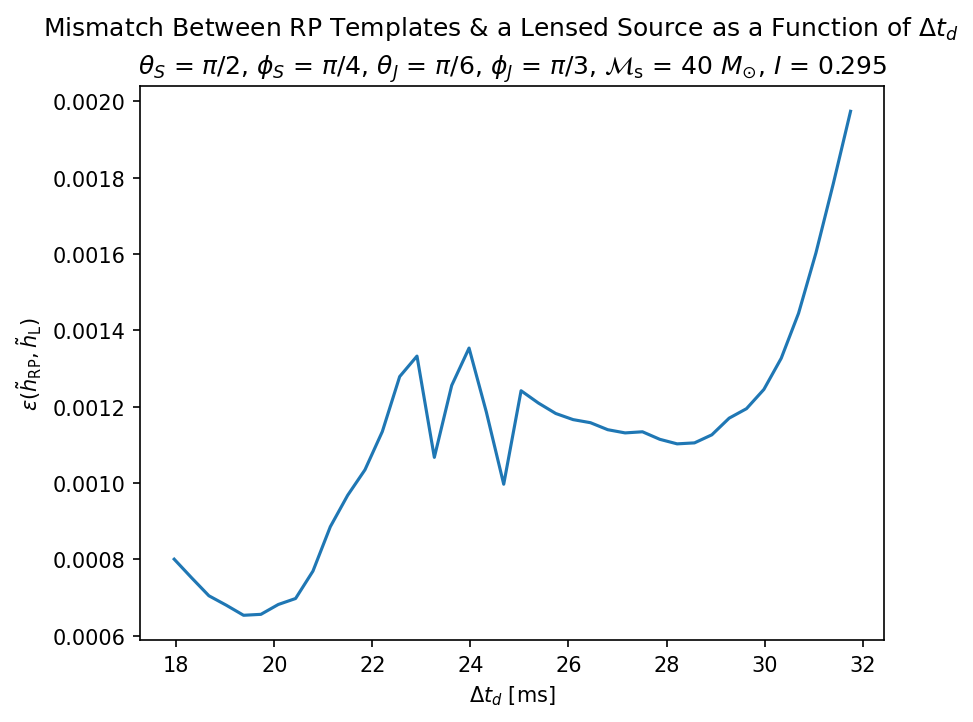

In [11]:
r = 32
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr * 1e3, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [12]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_min_err_mtx = np.zeros_like(X)
omega_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["omega_tilde_err"])
        omega_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["omega_tilde_err"])

omega_err_arr = np.array(
    [
        td_best_omega_arr - omega_min_err_mtx[r, :],
        omega_max_err_mtx[r, :] - td_best_omega_arr,
    ]
)

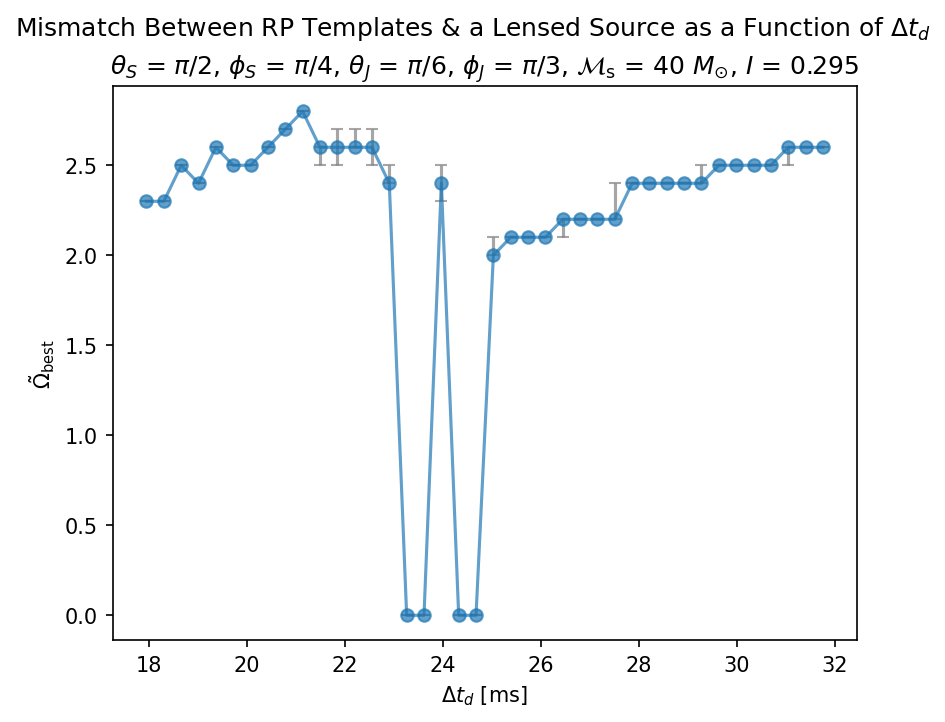

In [13]:
plt.errorbar(
    td_arr * 1e3,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [14]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

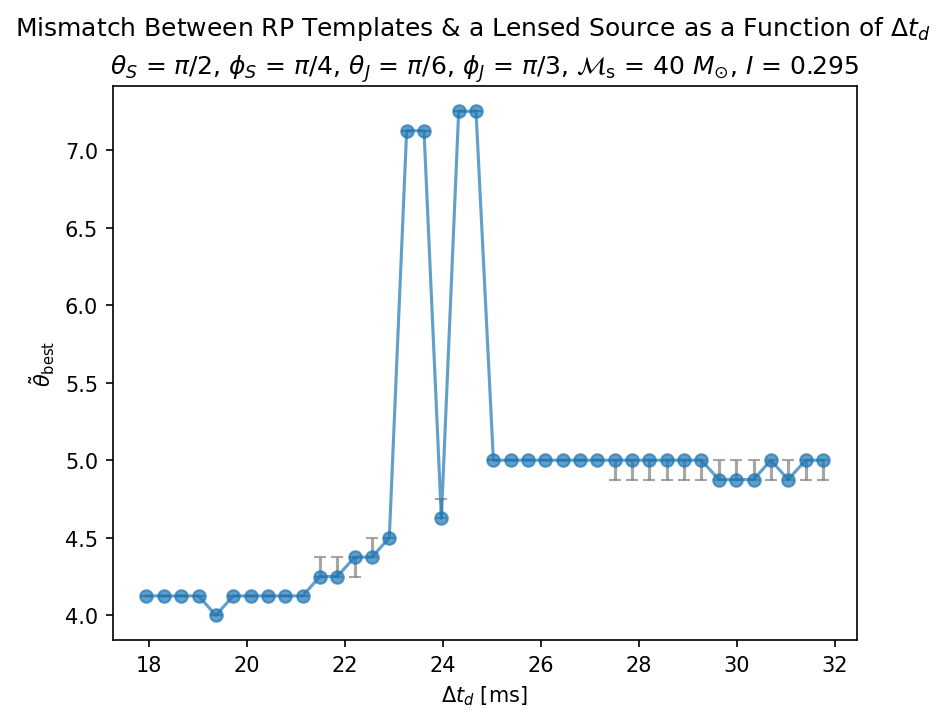

In [15]:
plt.errorbar(
    td_arr * 1e3,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

## track local minima

In [38]:
from scipy import optimize, interpolate


def interpolate_contour_data(data):
    x = np.arange(data.shape[1])
    y = np.arange(data.shape[0])
    return interpolate.RectBivariateSpline(y, x, data)


def find_local_minima(interpolated, initial_guess=(0, 0)):
    objective = lambda x: interpolated(x[0], x[1], grid=False)
    result = optimize.minimize(objective, initial_guess, method="Nelder-Mead")
    return result.x if result.success else None


# Assuming data is a dictionary with td as keys and 2D contour arrays as values
minima_tracking = {}

initial_guess = (0, 0)  # Initial guess for the first contour
for td in td_arr:
    contour_data = data[td][I_arr[r]]["contour"]["epsilon_matrix"]
    interpolated = interpolate_contour_data(contour_data)
    minima_location = find_local_minima(interpolated, initial_guess=initial_guess)
    minima_tracking[td] = minima_location
    initial_guess = minima_location  # Use the found minima as the initial guess for the next contour

# minima_tracking now contains the tracked minima locations for each td

In [47]:
def find_local_minima_in_contour(contour_data):
    # Assuming contour_data is a 2D numpy array
    minima_locations = []
    for i in range(3, contour_data.shape[0] - 3):
        for j in range(3, contour_data.shape[1] - 3):
            # Define the neighborhood
            neighborhood = contour_data[i - 3 : i + 4, j - 3 : j + 4]
            # Check if the current point is a local minimum
            if (
                contour_data[i, j] == np.min(neighborhood)
                and np.count_nonzero(neighborhood == contour_data[i, j]) == 1
            ):
                minima_locations.append((i, j))
    return minima_locations


# Assuming data is a dictionary with td as keys and 2D contour arrays as values
minima_tracking = {}
minima_omega = {}
minima_theta = {}
minima_ep = {}

for td in td_arr:
    contour_data = data[td][I_arr[r]]["contour"]
    minima_locations = find_local_minima_in_contour(contour_data["epsilon_matrix"])
    # For simplicity, track the first found minimum; adapt as needed
    if minima_locations:
        minima_tracking[td] = minima_locations[0]
        minima_omega[td] = contour_data["omega_matrix"][minima_locations[0]]
        minima_theta[td] = contour_data["theta_matrix"][minima_locations[0]]
        minima_ep[td] = contour_data["epsilon_matrix"][minima_locations[0]]
    else:
        minima_tracking[td] = None

# minima_tracking now contains the tracked minima locations for each td

In [35]:
from scipy.ndimage import minimum_filter, label


def find_local_minima_in_contour(contour_data, how_many=2, distance_threshold=5):
    # Apply a minimum filter to find local minima
    minima_mask = contour_data == minimum_filter(contour_data, size=distance_threshold)

    # Label each local minimum
    labeled_minima, num_features = label(minima_mask)

    # Extract the positions and values of the local minima
    minima_positions = np.array(np.where(minima_mask)).T
    minima_values = contour_data[minima_mask]

    # Sort minima by their values (ascending)
    sorted_indices = np.argsort(minima_values)
    sorted_minima_positions = minima_positions[sorted_indices]

    # Track distinct minima
    tracked_minima = []
    for pos in sorted_minima_positions:
        if not tracked_minima:
            tracked_minima.append(pos)
            continue
        # Check if the current minimum is sufficiently far from already tracked minima
        if all(
            np.linalg.norm(pos - np.array(tracked), ord=2) >= distance_threshold
            for tracked in tracked_minima
        ):
            tracked_minima.append(pos)
            if len(tracked_minima) == how_many:
                break

    # Return positions (and optionally values) of the tracked minima
    return [contour_data[tuple(pos)] for pos in tracked_minima], tracked_minima


# Assuming data is a dictionary with td as keys and 2D contour arrays as values
minima_tracking = {}

for td in td_arr:
    contour_data = data[td][I_arr[r]]["contour"]["epsilon_matrix"]
    minima_values, minima_positions = find_local_minima_in_contour(contour_data)
    minima_tracking[td] = minima_positions

# minima_tracking now contains the tracked minima locations for each td

In [44]:
minima_tracking

{0.017958: (33, 23),
 0.018312: (33, 23),
 0.018666: (33, 25),
 0.019019: (33, 24),
 0.019373: (32, 26),
 0.019727: (33, 25),
 0.020081: (33, 25),
 0.020434: (33, 26),
 0.020788: (33, 27),
 0.021142: (35, 24),
 0.021496: (34, 26),
 0.021849: (34, 26),
 0.022203: (35, 26),
 0.022557: (35, 26),
 0.02291: (36, 24),
 0.023264: (36, 25),
 0.023618: (37, 24),
 0.023972: (37, 24),
 0.024325: (40, 20),
 0.024679: (40, 20),
 0.025033: (40, 20),
 0.025386: (40, 21),
 0.02574: (40, 21),
 0.026094: (40, 21),
 0.026448: (40, 22),
 0.026801: (40, 22),
 0.027155: (40, 22),
 0.027509: (40, 22),
 0.027863: (40, 24),
 0.028216: (40, 24),
 0.02857: (40, 24),
 0.028924: (40, 24),
 0.029277: (40, 24),
 0.029631: (39, 25),
 0.029985: (39, 25),
 0.030339: (39, 25),
 0.030692: (40, 25),
 0.031046: (39, 26),
 0.0314: (40, 26),
 0.031753: (40, 26)}

IntSlider(value=39, description='td index:', max=39)

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_18777/1812668607.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "wo" (-> color='w'). The keyword argument will take precedence.
  plt.plot(X_pos, Y_pos, "wo", label="Local Minima", c=linecolors.pop(0))


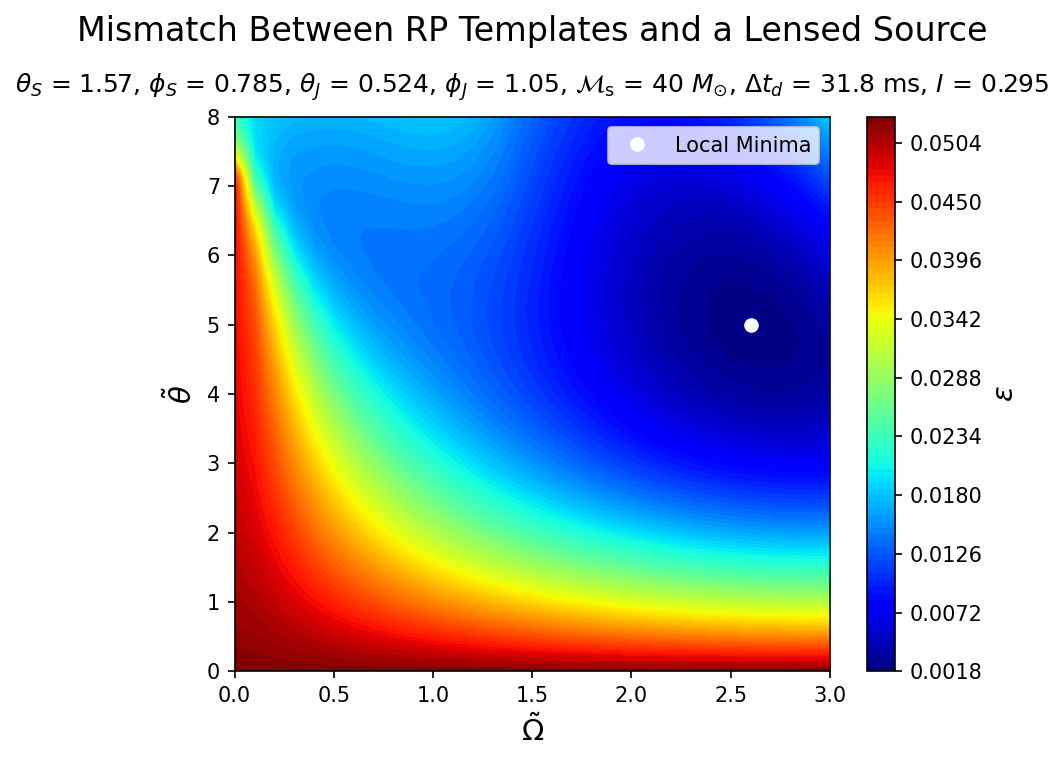

In [41]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
td_slider = widgets.IntSlider(
    min=0, max=len(td_arr) - 1, step=1, value=0, description="td index:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = td_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td], I_arr[r], plot_minima=False)
    contour_data = data[td][I_arr[r]]["contour"]
    linecolors = ["w", "black"]
    if minima_tracking[td] is not np.ndarray:
        minima_tracking[td] = np.array([minima_tracking[td]])
    for idx_pair in minima_tracking[td]:
        x_idx, y_idx = idx_pair
        x_idx = int(x_idx)
        y_idx = int(y_idx)
        X_pos = contour_data["omega_matrix"][x_idx, y_idx]
        Y_pos = contour_data["theta_matrix"][x_idx, y_idx]
        plt.plot(X_pos, Y_pos, "wo", label="Local Minima", c=linecolors.pop(0))
        plt.legend()


td_slider.observe(update_plot, names="value")

## update data after tracking

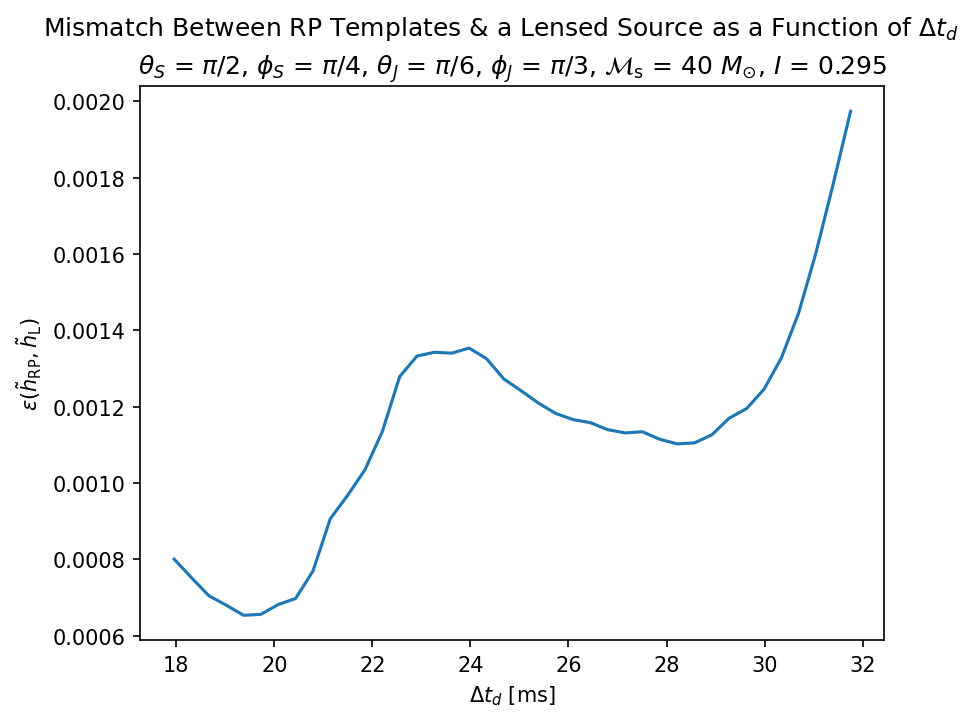

In [48]:
r = 32
td_ep_min_arr = [minima_ep[td] for td in td_arr]

plt.plot(td_arr * 1e3, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

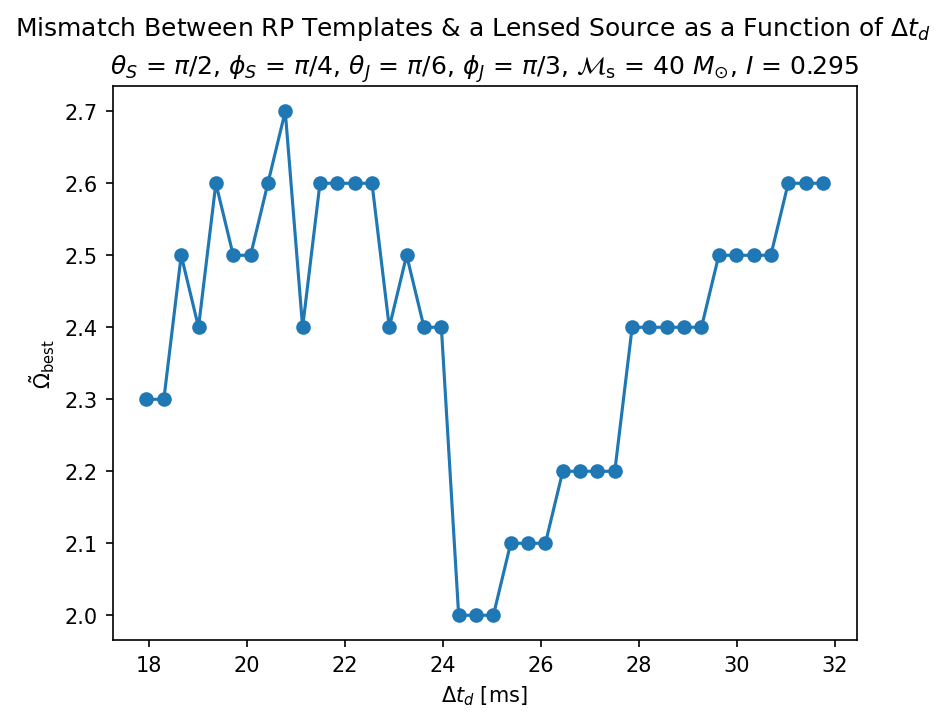

In [49]:
td_best_omega_arr = [minima_omega[td] for td in td_arr]

plt.plot(td_arr * 1e3, td_best_omega_arr, "-o", label=r"$\~{\Omega}_{\rm best}$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

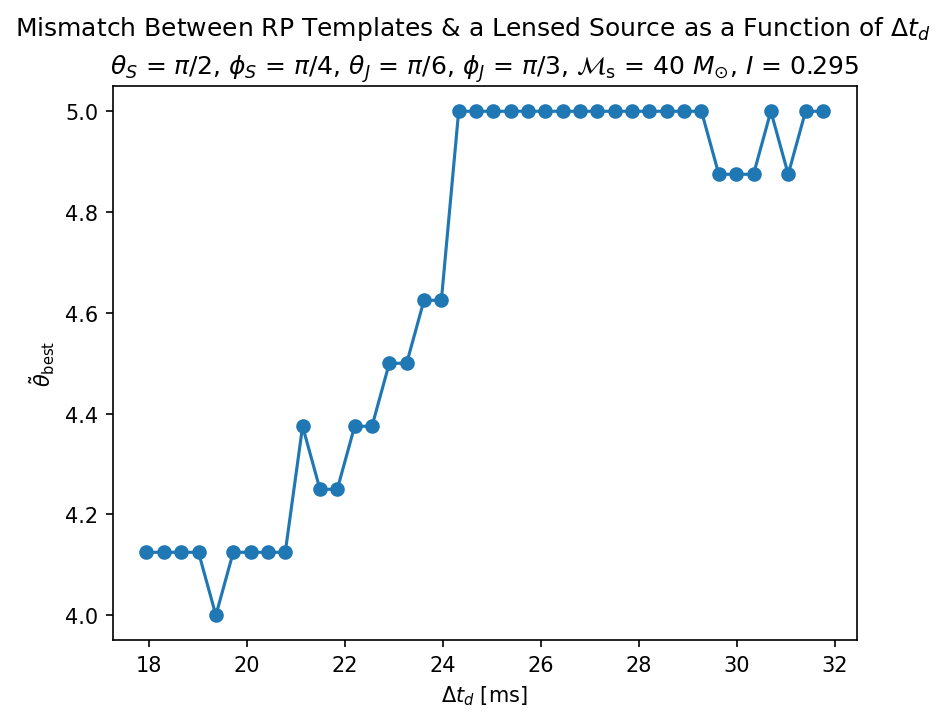

In [51]:
td_best_theta_arr = [minima_theta[td] for td in td_arr]

plt.plot(td_arr * 1e3, td_best_theta_arr, "-o", label=r"$\~{\theta}_{\rm best}$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

# as a function of $I$ while fixing $\Delta t_d$

In [17]:
c = 18
data_I = data[td_arr[c]]

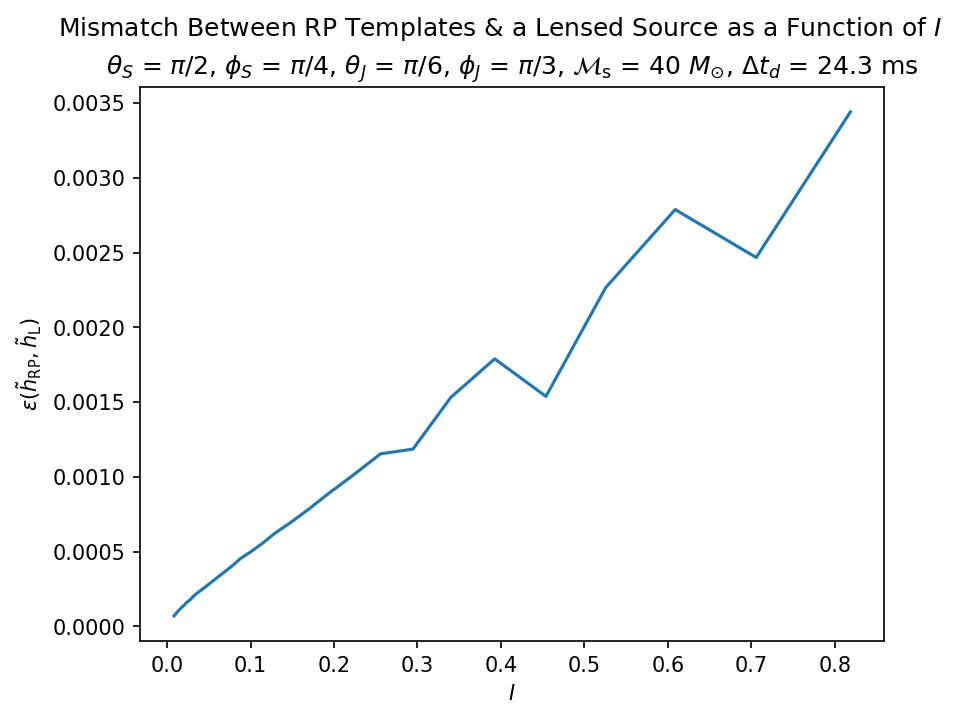

In [18]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

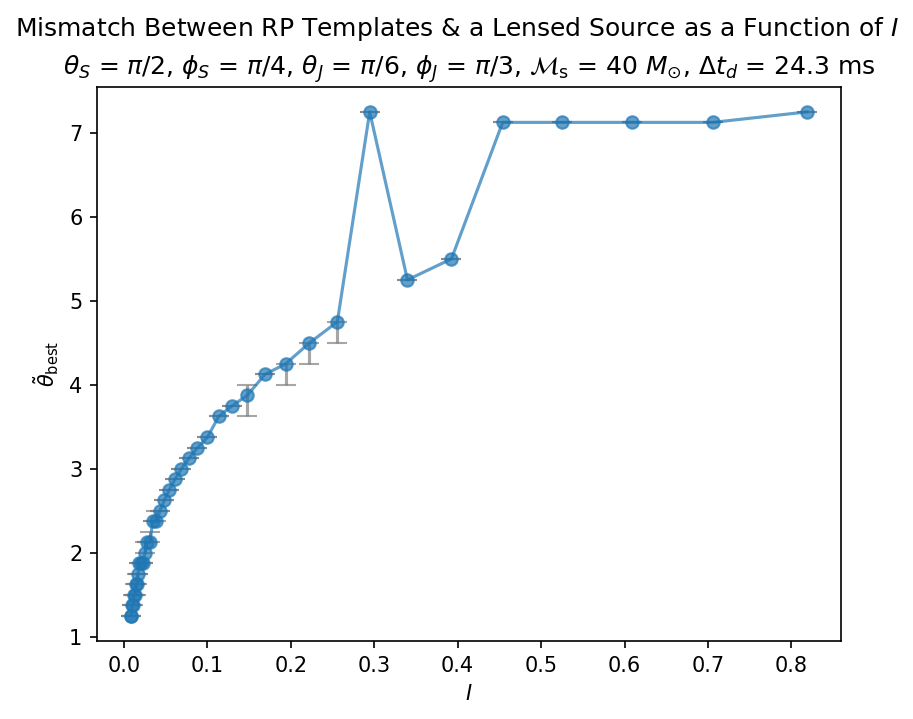

In [19]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

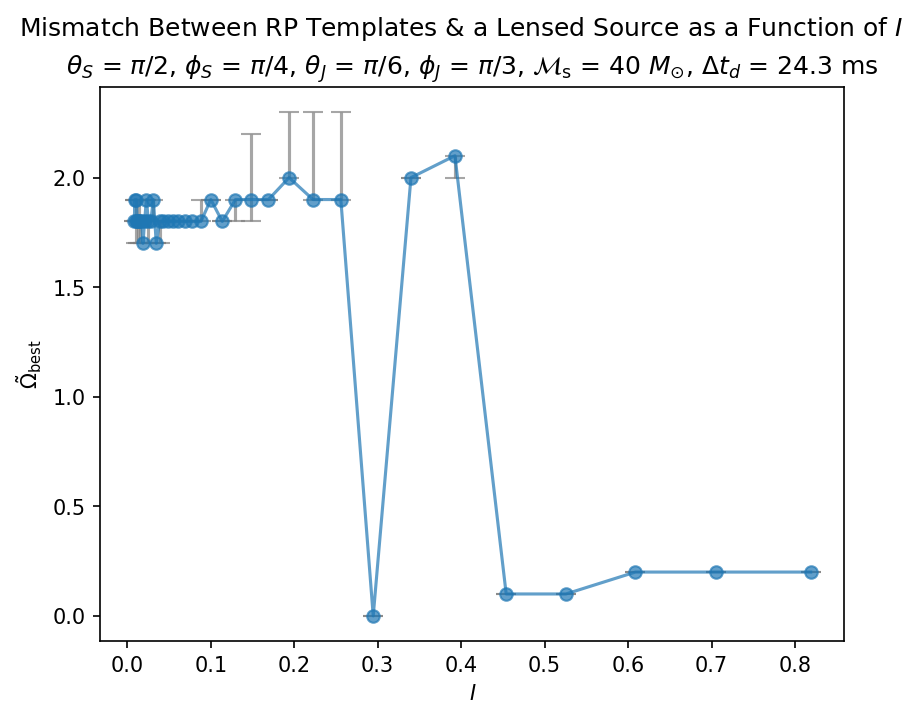

In [20]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

IntSlider(value=30, description='I index:', max=39)

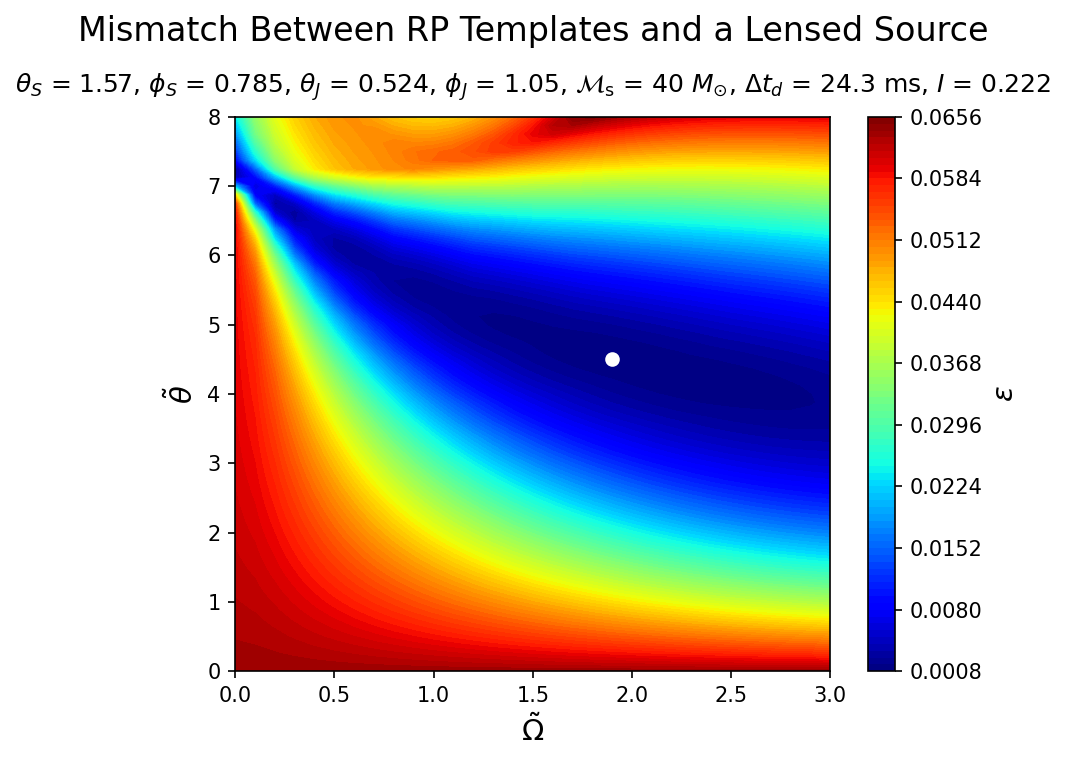

In [21]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
I_slider = widgets.IntSlider(
    min=0, max=len(I_arr) - 1, step=1, value=0, description="I index:"
)
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = I_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td_arr[c]], I)  # type: ignore


I_slider.observe(update_plot, names="value")

# waveform comparison

In [28]:
# make data_td like data_I but with td as the key
I = I_arr[r]
data_td = {}
for td in td_arr:
    data_td[td] = data[td][I]

data_td["source_params"] = data[td_arr[0]]["source_params"]

idx = -4.74163e-09, phi = 1.66728e-08, both should be ~0 if get_updated_mismatch_results is True


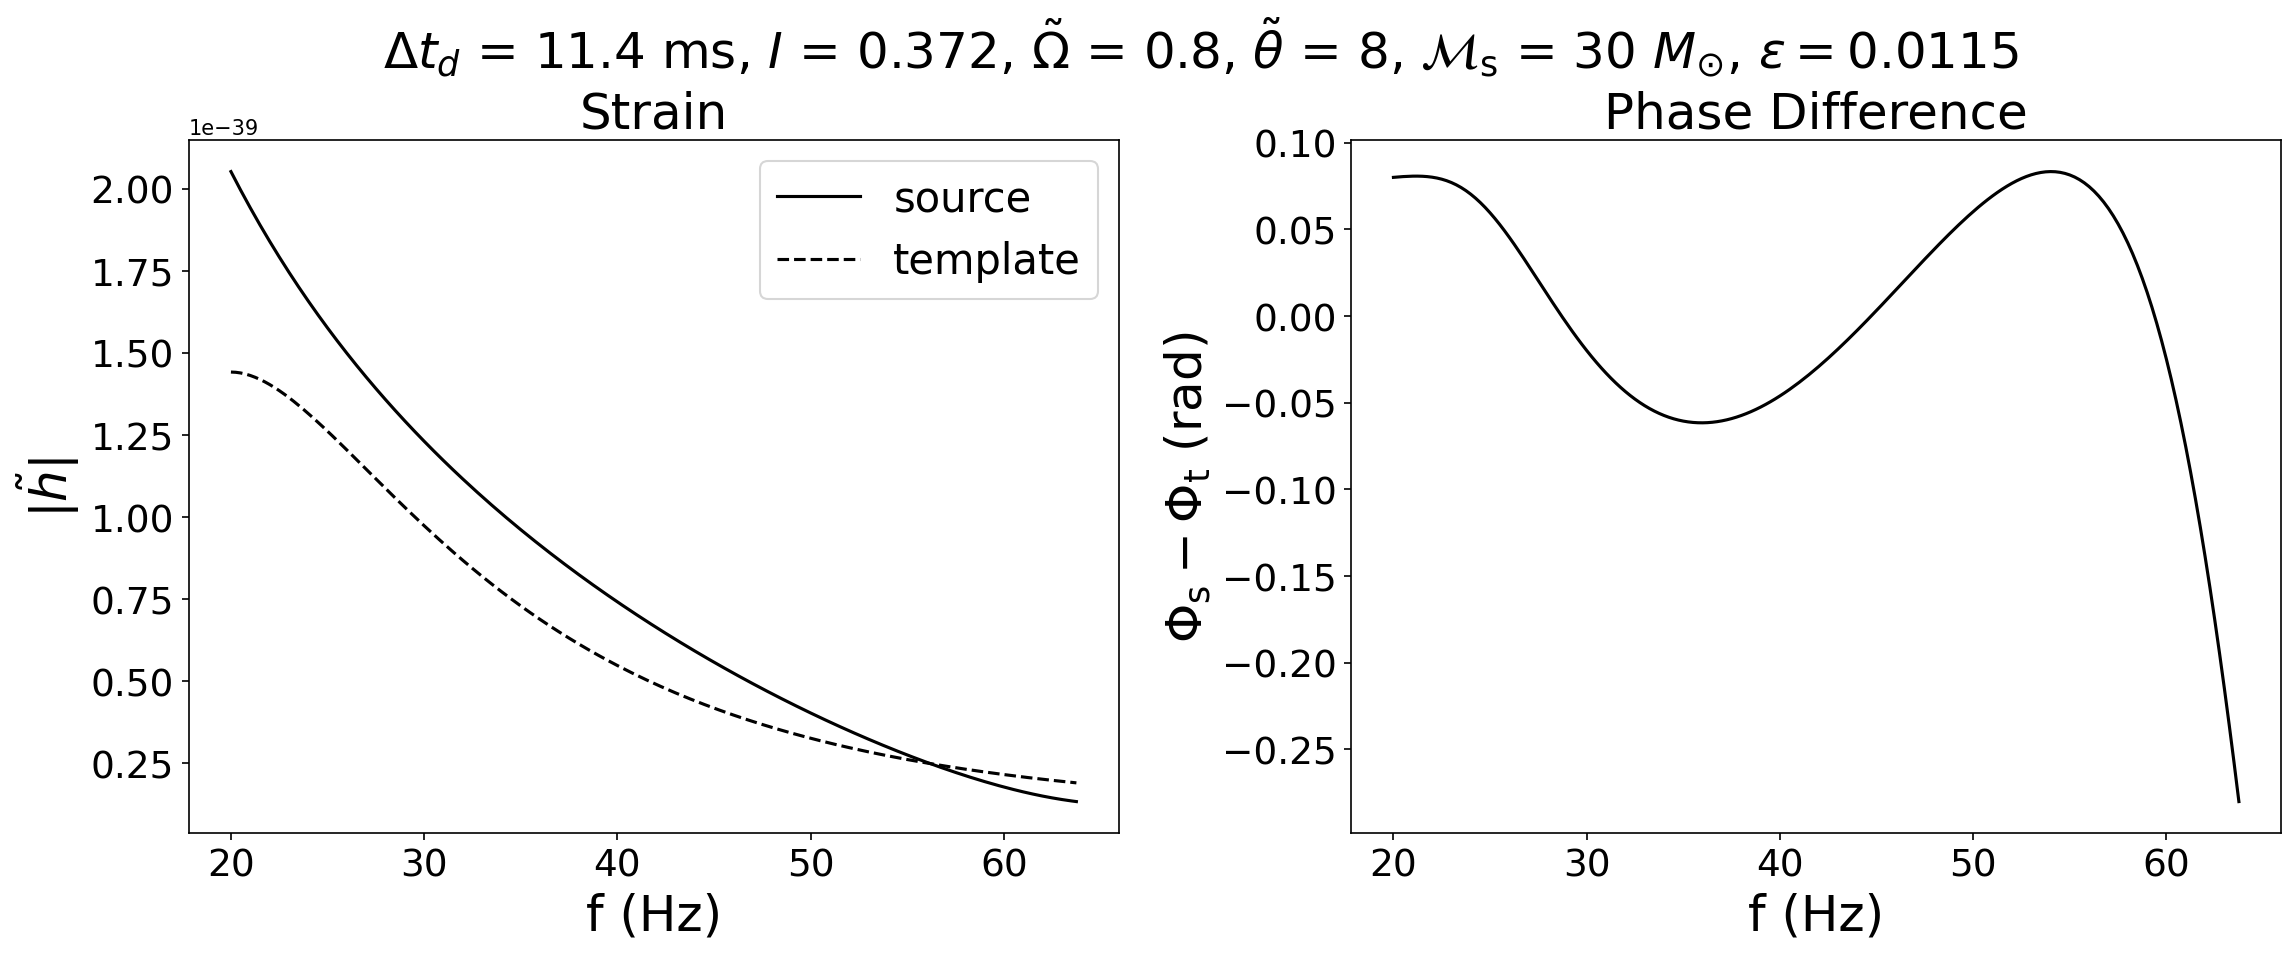

idx = -4.0277e-09, phi = -2.90184e-08, both should be ~0 if get_updated_mismatch_results is True


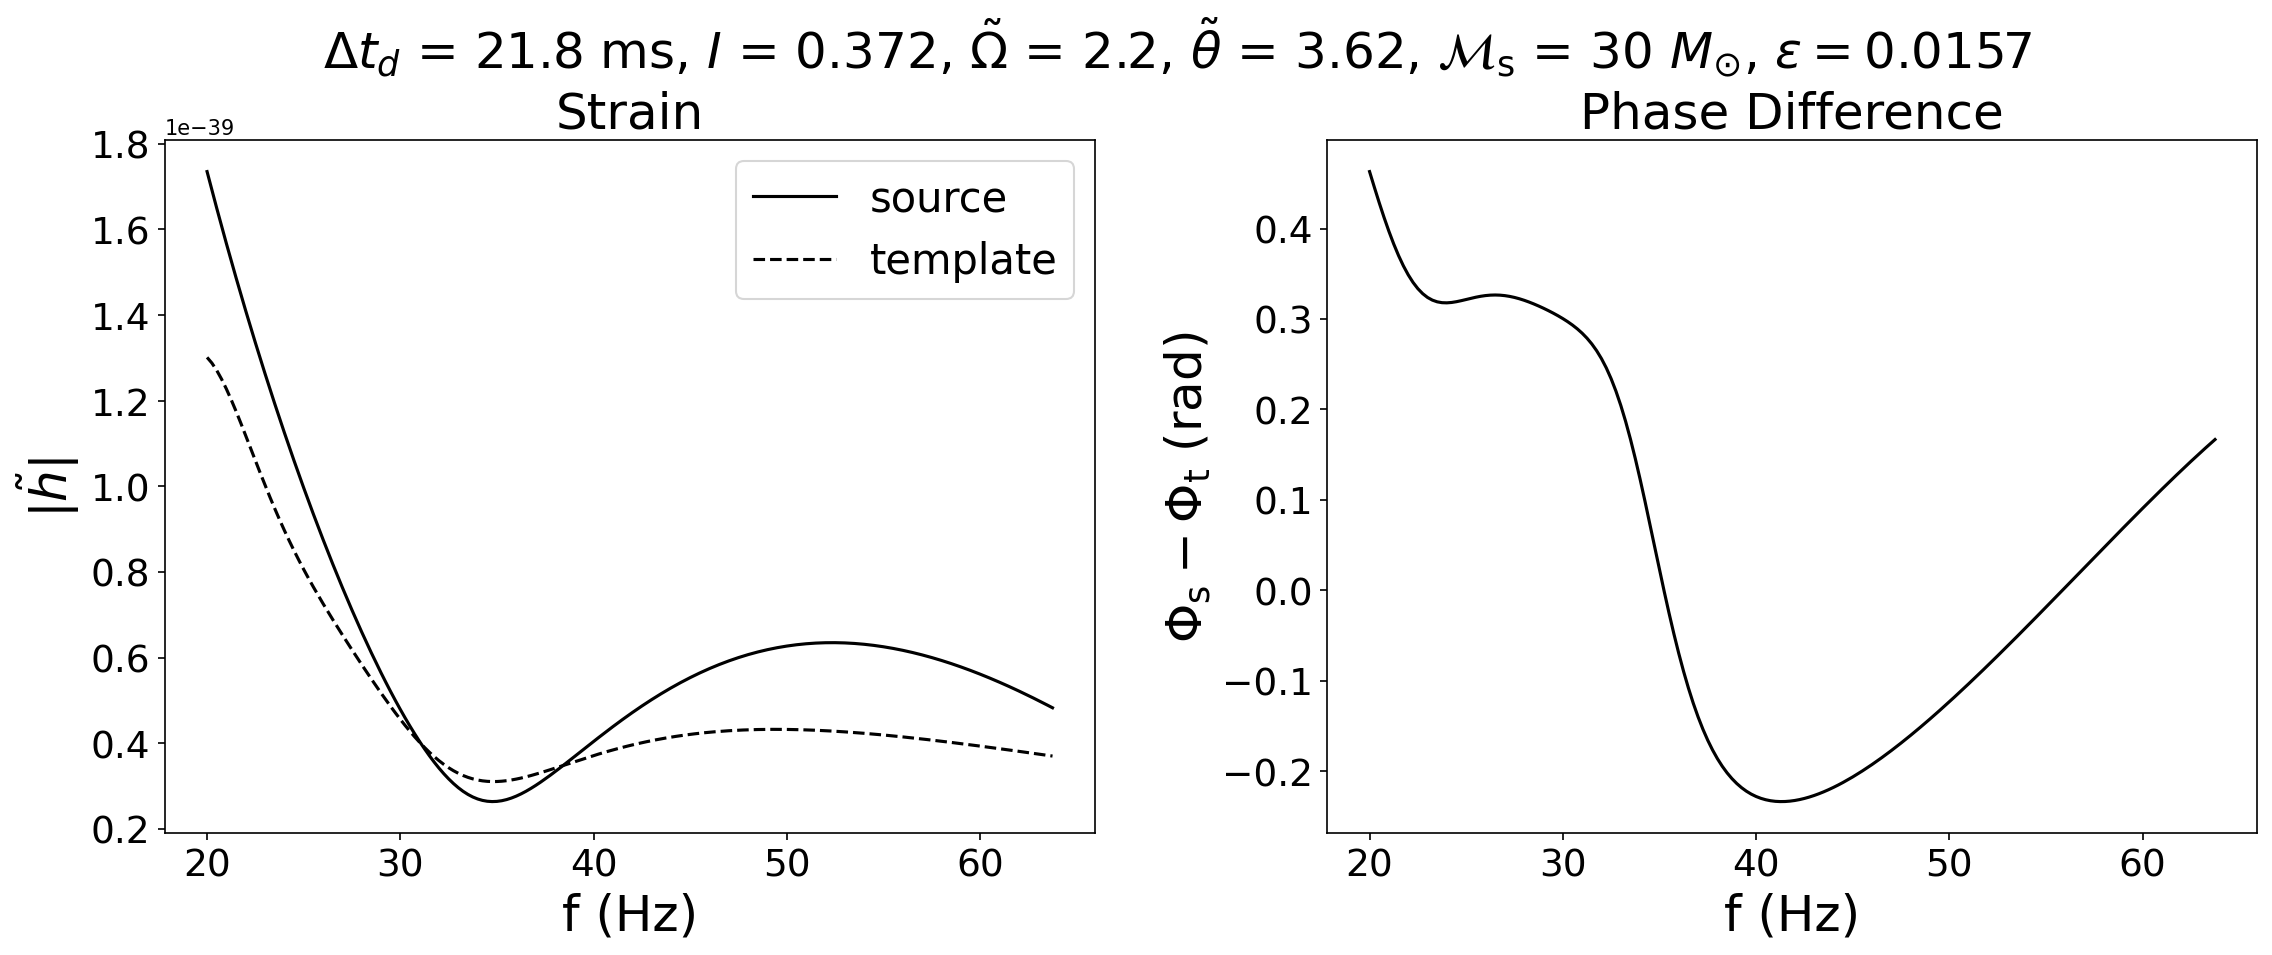

In [33]:
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = get_MLz_from_td(td_arr, data_td["source_params"]["y"])

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()